# Assignment 2: Supervised Machine Learning (Classification)





In [10]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of dataset failed: Traceback (most recent call last):
  File "/Users/Tasya/Documents/ALL/BIMECH/Rita/python-assignment-2/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Tasya/Documents/ALL/BIMECH/Rita/python-assignment-2/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in sou

In [11]:
from config_reader import ConfigReader
from dataset import Dataset
from data_predictor import DataPredictor
from evaluation_metrics import EvaluationMetrics
import matplotlib as plt
%matplotlib inline

The three sklearn classifiers [_SVM_](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (Support Vector Classification), [_Logistic Regression Classifier_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and [_Dummy Classifier_](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) are imported to the notebook and instantiated. You should try additional classifiers from [sklearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) yourself.   
**Don't forget** to import and add your own implementation of kNN!

In [12]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from knn import kNN


knn_clf = kNN(10)

dummy_clf = DummyClassifier(strategy="most_frequent")
support_vector_clf = svm.SVC(kernel="linear") 
logistic_regression_clf = LogisticRegression(random_state=0, max_iter=10000)


## Heart Disease Dataset

Let's try the classifiers on the Heart Disease Dataset, by passing the created classifier objects to ``DataPredictor``'s ``best_classifier`` method (add your additional classifier objects to the list here). For comparison and visualization, the methods ``print_evaluation_results`` and ``visualize_classification_results`` are called.

In [24]:
config_dict = ConfigReader.read_json_config("./config_heart_disease.json")
dataset = Dataset(config_dict)
str(Dataset.config_dict)
predictor = DataPredictor(dataset, config_dict)

AttributeError: type object 'Dataset' has no attribute 'config_dict'

In [14]:
import numpy as np
dataset.split_data(impute_strategy='mean')
e = EvaluationMetrics(np.array([0, 1, 1, 0, 2, 2, 2, 2, 2]), np.array([0, 1, 0, 0, 2, 2, 2, 0, 0]))
print(e)
print(e.confusion_matrix)

Evaluation Summary:
	Accuracy: 0.67
	Precision:
		Class 0: 0.4			Class 1: 1.0			Class 2: 1.0			
	Recall:
		Class 0: 1.0			Class 1: 0.5			Class 2: 0.6			
	F1 Score:
		Class 0: 0.57			Class 1: 0.67			Class 2: 0.75				
	True Positives:
		Class 0: 2			Class 1: 1			Class 2: 3				
	True Negatives:
		Class 0: 4			Class 1: 7			Class 2: 4				
	False Positives:
		Class 0: 3			Class 1: 0			Class 2: 0		
	False Negatives:
		Class 0: 0			Class 1: 1			Class 2: 2	

[[2 0 0]
 [1 1 0]
 [2 0 3]]


Classifiers Ranked by Accuracy:
	SVC(kernel='linear') Accuracy Score: 0.8
	LogisticRegression(max_iter=10000, random_state=0) Accuracy Score: 0.8
	kNN(n_neighbors=10) Accuracy Score: 0.71
	DummyClassifier(strategy='most_frequent') Accuracy Score: 0.54
Detailed info on the best classifier SVC(kernel='linear'): 
Evaluation Summary:
	Accuracy: 0.8
	Precision:
		Class 0: 0.78			Class 1: 0.82			
	Recall:
		Class 0: 0.8			Class 1: 0.8			
	F1 Score:
		Class 0: 0.79			Class 1: 0.81				
	True Positives:
		Class 0: 112			Class 1: 132				
	True Negatives:
		Class 0: 132			Class 1: 112				
	False Positives:
		Class 0: 32			Class 1: 28		
	False Negatives:
		Class 0: 28			Class 1: 32	



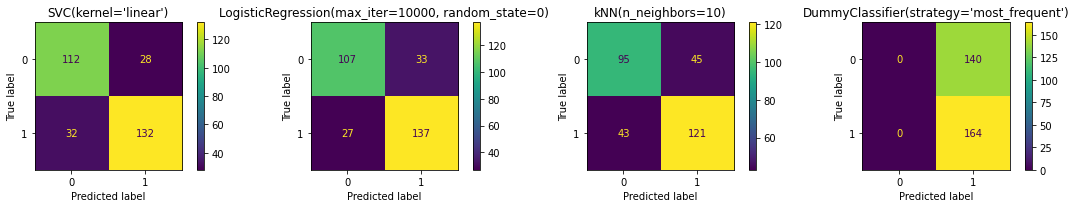

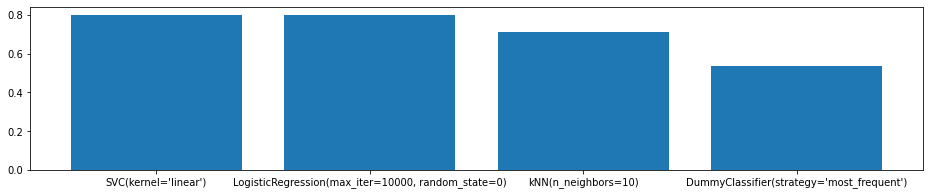

In [15]:
best_classifier = predictor.best_classifier([dummy_clf, support_vector_clf, logistic_regression_clf, knn_clf])
predictor.print_evaluation_results()
predictor.visualize_classification_results()

## Parkinson Speech Dataset

Now with the Parkinson Speech Dataset, again the created classifier objects are passed to ``DataPredictor``'s ``best_classifier`` method (add your additional classifier objects to the list here). For comparison and visualization, the methods ``print_evaluation_results`` and ``visualize_classification_results`` are called.

In [16]:
config_dict = ConfigReader.read_json_config("./config_parkinson_sound_recording.json")
dataset = Dataset(config_dict)
predictor = DataPredictor(dataset, config_dict)

Classifiers Ranked by Accuracy:
	kNN(n_neighbors=10) Accuracy Score: 0.64
	SVC(kernel='linear') Accuracy Score: 0.64
	LogisticRegression(max_iter=10000, random_state=0) Accuracy Score: 0.64
	DummyClassifier(strategy='most_frequent') Accuracy Score: 0.55
Detailed info on the best classifier kNN(n_neighbors=10): 
Evaluation Summary:
	Accuracy: 0.64
	Precision:
		Class 0: 0.6			Class 1: 0.68			
	Recall:
		Class 0: 0.62			Class 1: 0.67			
	F1 Score:
		Class 0: 0.61			Class 1: 0.67				
	True Positives:
		Class 0: 110			Class 1: 147				
	True Negatives:
		Class 0: 147			Class 1: 110				
	False Positives:
		Class 0: 74			Class 1: 68		
	False Negatives:
		Class 0: 68			Class 1: 74	



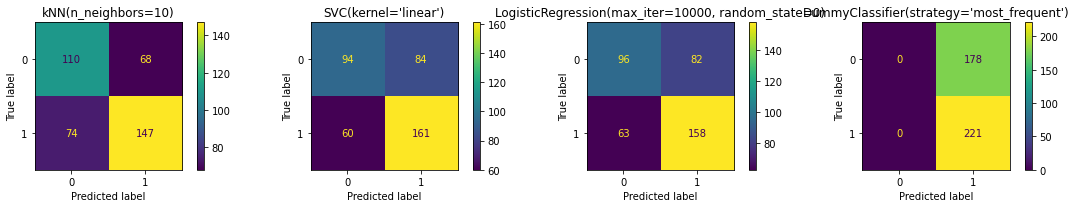

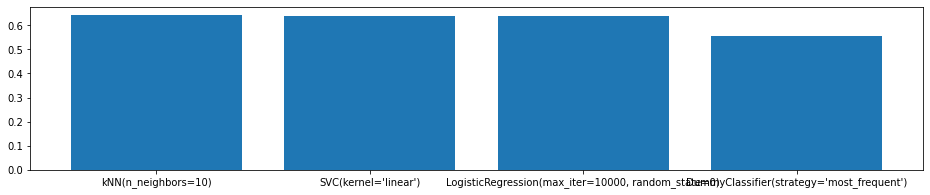

In [17]:
best_classifier = predictor.best_classifier([dummy_clf, support_vector_clf, logistic_regression_clf, knn_clf])#, support_vector_clf, logistic_regression_clf])
predictor.print_evaluation_results()
predictor.visualize_classification_results()

In [20]:
#print(test_size)
print(self._test_size)


NameError: name 'self' is not defined